In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision.models as models
from PIL import Image
import numpy as np
from torch.utils.data import random_split

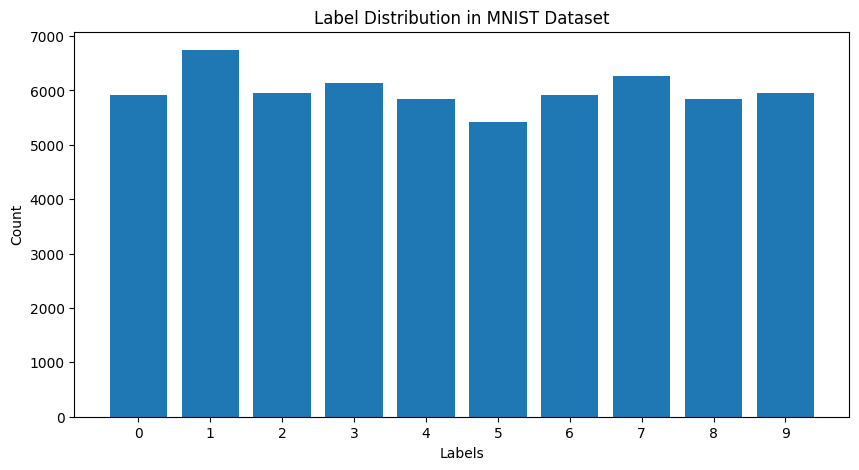

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [6]:
# Define a function to load and visualize the label distribution
def visualize_label_distribution(trainloader):
    label_count = {}
    
    for _, labels in trainloader:
        for label in labels:
            label_count[label.item()] = label_count.get(label.item(), 0) + 1

    labels, counts = zip(*label_count.items())

    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts)
    plt.xticks(np.arange(10))
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title('Label Distribution in MNIST Dataset')
    plt.show()

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Visualize the label distribution
visualize_label_distribution(trainloader)
print(trainset)

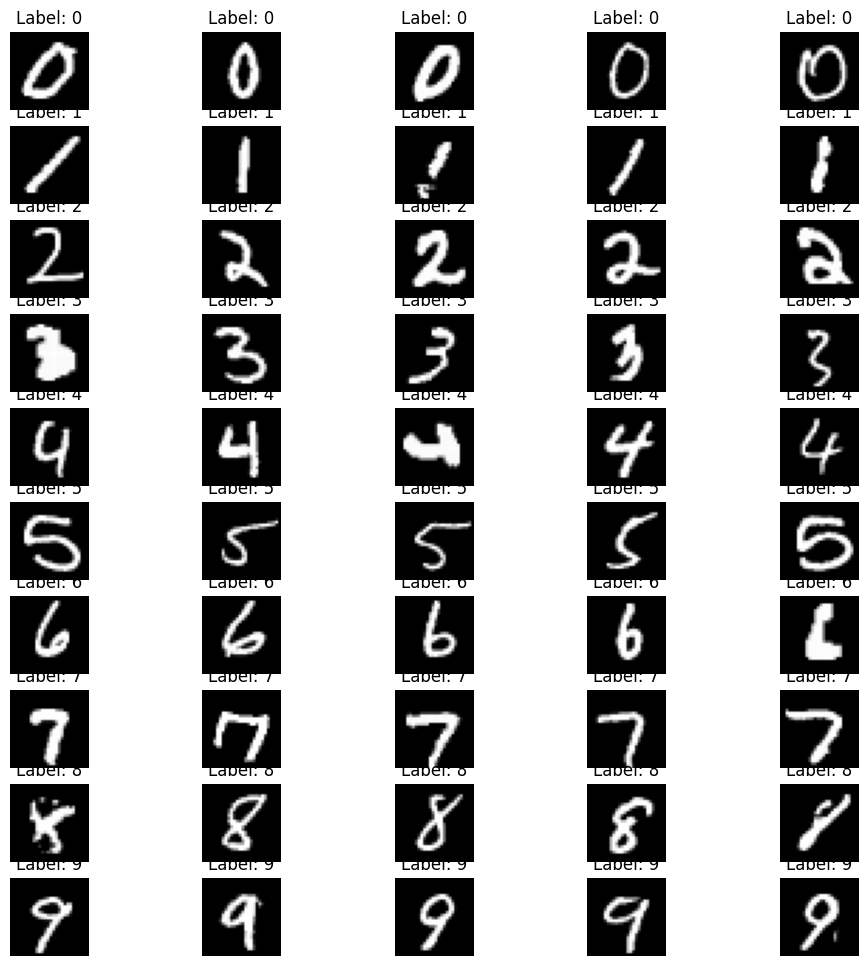

In [7]:
# Define a function to visualize samples from each class
def visualize_samples(trainloader, num_samples=5):
    fig, axes = plt.subplots(10, num_samples, figsize=(12, 12))
    
    sample_images = {}
    for i in range(10):
        sample_images[i] = []

    for images, labels in trainloader:
        for image, label in zip(images, labels):
            if len(sample_images[label.item()]) < num_samples:
                sample_images[label.item()].append(image)

    for i in range(10):
        for j in range(num_samples):
            axes[i, j].imshow(sample_images[i][j][0].numpy(), cmap='gray')
            axes[i, j].set_title(f'Label: {i}')
            axes[i, j].axis('off')

    plt.show()

# Visualize samples from each class
visualize_samples(trainloader, num_samples=5)


In [9]:
from torch.utils.data import random_split

# Define the sizes for train, validation, and test sets
total_size = len(trainset)
train_size = int(0.6 * total_size)
validation_size = int(0.2 * total_size)
test_size = total_size - train_size - validation_size

# Split the dataset
train_set, validation_set, test_set = random_split(trainset, [train_size, validation_size, test_size])

# Create data loaders for each set
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
validationloader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)


In [16]:
def visualize_feature_maps(model, layer_num, input_image):
    activation = model.features[:layer_num + 1](input_image)
    
    # Select one of the feature maps (channel)
    feature_map = activation[0, 0].detach().numpy()

    plt.figure(figsize=(8, 8))
    plt.imshow(feature_map, cmap='viridis')
    plt.axis('off')
    plt.title(f'Feature Map for Layer {layer_num}')
    plt.show()

